<a href="https://colab.research.google.com/github/mzamani18/AP_project/blob/master/DM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM_Project

## install packages

In [ ]:
!pip install split-folders
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## import libraries

In [ ]:
import zipfile
import cv2
from google.colab.patches import cv2_imshow
import os 
import seaborn as sns 
import glob
import cv2
import numpy as np 
import keras
from sklearn.metrics import classification_report,  accuracy_score

In [ ]:
import tensorflow.keras.utils as ut 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import splitfolders
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.utils.vis_utils import plot_model
from tensorflow.keras.applications import*
from sklearn import metrics
from sklearn.svm import SVC

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold

## Loade Dataset:

#### Download Dataset

In [ ]:
!wget --no-check-certificate \
    "https://www.muratkoklu.com/datasets/Grapevine_Leaves_Image_Dataset.zip" \
    -O "/tmp/grapevine.zip"

--2022-08-05 19:10:19--  https://www.muratkoklu.com/datasets/Grapevine_Leaves_Image_Dataset.zip
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113862245 (109M) [application/zip]
Saving to: ‘/tmp/grapevine.zip’

/tmp/grapevine.zip  100%[===================>] 108.59M  15.3MB/s    in 8.4s    

2022-08-05 19:10:29 (12.9 MB/s) - ‘/tmp/grapevine.zip’ saved [113862245/113862245]



#### UnZip File

In [ ]:
with zipfile.ZipFile('/tmp/grapevine.zip', 'r') as zFile :
  zFile.extractall("/tmp")

print(os.listdir("/tmp/Grapevine_Leaves_Image_Dataset"))

RootDir = "/tmp/Grapevine_Leaves_Image_Dataset"

['Ala_Idris', 'Nazli', 'Buzgulu', 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt', 'Dimnit', 'Ak']


#### Aggregate Data

```
# put all images into one list
# then save label of every images
```

Ala_Idris
/tmp/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (63).png


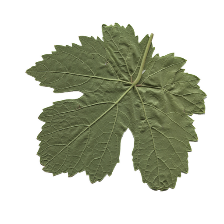

/tmp/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (21).png
/tmp/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (50).png
/tmp/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (64).png


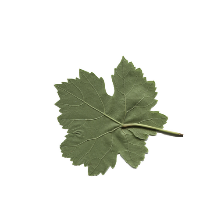

/tmp/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (43).png
Nazli
/tmp/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (76).png
/tmp/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (44).png
/tmp/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (97).png


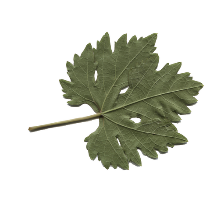

/tmp/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (50).png
/tmp/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (89).png
Buzgulu
/tmp/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (67).png
/tmp/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (4).png


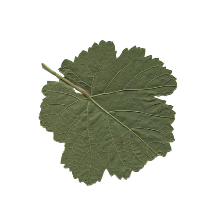

/tmp/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (88).png
/tmp/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (23).png
/tmp/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (92).png
Grapevine_Leaves_Image_Dataset_Citation_Request.txt
Dimnit
/tmp/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (3).png


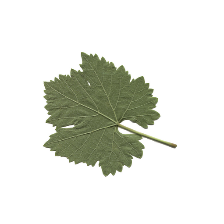

/tmp/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (59).png
/tmp/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (70).png
/tmp/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (12).png
/tmp/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (9).png


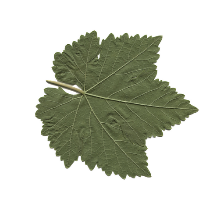

Ak
/tmp/Grapevine_Leaves_Image_Dataset/Ak/Ak (86).png
/tmp/Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png
/tmp/Grapevine_Leaves_Image_Dataset/Ak/Ak (84).png
/tmp/Grapevine_Leaves_Image_Dataset/Ak/Ak (15).png


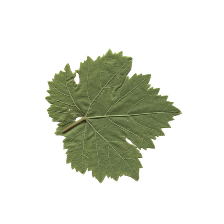

/tmp/Grapevine_Leaves_Image_Dataset/Ak/Ak (85).png


In [ ]:
size = 224
images=[]
labels = []
k = 0

for dir_path in glob.glob('/tmp/Grapevine_Leaves_Image_Dataset/*'):
    label = dir_path.split("/", 5)[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.png")):
        if(k % 20 == 0) : print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(size,size))
        img = cv2.cvtColor(img,cv2.IMREAD_COLOR)
        if (k%77 == 0) :cv2_imshow(img)
        images.append(img)
        labels.append(label)
        k+=1

images = np.array(images)
labels = np.array(labels)        

#### Encode Labels

```
# encoded all classes to a digit
# then print encoded lable for classes
```



In [ ]:
le = LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

class_names = ['Ak','Ala_Idris' ,'Buzgulu', 'Dimnit','Nazli']

indexes = [20,120,220,320,420]
table_data = []
for i in indexes :
  table_data.append(["encoded label of " , labels[i] , "is: " , labels_encoded[i]])

for row in table_data:
    print("{: >20} {: >10} {: >7} {: >7}".format(*row))   

   encoded label of   Ala_Idris    is:        1
   encoded label of       Nazli    is:        4
   encoded label of     Buzgulu    is:        2
   encoded label of      Dimnit    is:        3
   encoded label of          Ak    is:        0


#### Split Dataset

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(images,labels_encoded, test_size = 0.2, random_state = 2)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

#### Data augmentation

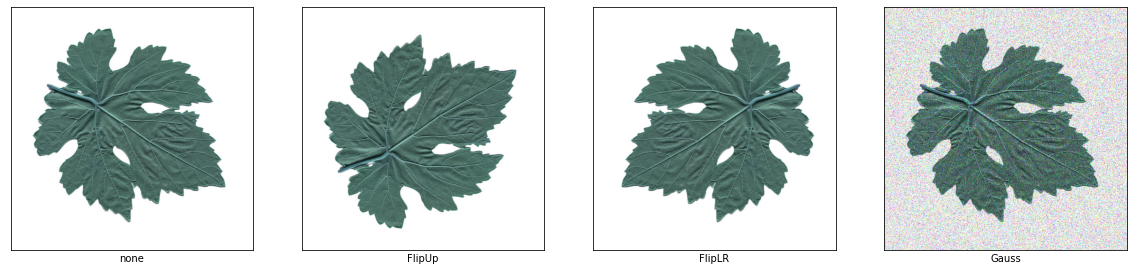

In [ ]:
def FlipUp(img):
  new_img = np.copy(img)
  return np.flipud(new_img)

def FlipLR(img):
    new_img = np.copy(img)
    return np.fliplr(new_img)

def Gauss(img):
    std = 0.3
    return np.maximum(np.minimum(img * np.random.normal(1, std , img.shape), 1), 0)
  
img_path = "/tmp/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (74).png"
img = cv2.imread(img_path,cv2.IMREAD_COLOR)
img = img / 255

im = []
im.append(img)

new_img = FlipUp(img)
im.append(new_img)

new_img = FlipLR(img)
im.append(new_img)
 
new_img = Gauss(img)
im.append(new_img)

Agu_typ = ['none','FlipUp' ,'FlipLR', 'Gauss']

plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(im[i])
    plt.xlabel(Agu_typ[i])
plt.show()

In [ ]:
X_train = []
Y_train = []
for i,image in enumerate(x_train):
  X_train.append(image)
  X_train.append(FlipUp(image))
  X_train.append(FlipLR(image))
  X_train.append(Gauss(image))
  # X_train.append(Gauss(FlipLR(image)))
  for _ in range(4): Y_train.append(y_train[i])

#### split trainset

In [ ]:
x_train_aug, x_validate_aug , y_train_aug, y_validate_aug = train_test_split(X_train,Y_train, test_size = 0.2, random_state = 42)
x_train_aug = np.array(x_train_aug) 
y_trian_aug = np.array(y_train_aug)

x_validate_aug = np.array(x_validate_aug)
y_validate_aug =  np.array(y_validate_aug)
del X_train , Y_train

#### Show Data 

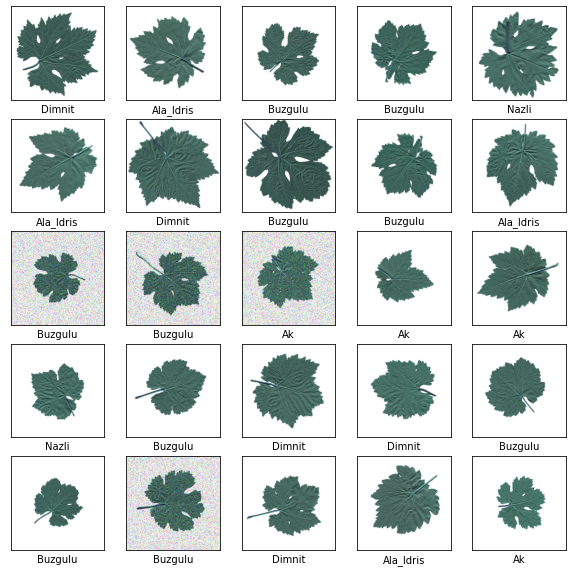

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_aug[i])
    plt.xlabel(class_names[y_train_aug[i]])
plt.show()

## CNN Model

#### Build the Model

In [ ]:
def build_model():

  model = keras.Sequential()
  model.add(keras.Input(shape=(224, 224, 3))) 
  model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
  model.add(layers.Conv2D(32, 3, activation="relu"))
  model.add(layers.MaxPooling2D(3))

  # The answer was: (40, 40, 32), so we can keep downsampling...

  model.add(layers.Conv2D(32, 3, activation="relu"))
  model.add(layers.Conv2D(32, 3, activation="relu"))
  model.add(layers.MaxPooling2D(3))
  model.add(layers.Conv2D(32, 3, activation="relu"))
  model.add(layers.Conv2D(32, 3, activation="relu"))
  model.add(layers.MaxPooling2D(2))

  #   Now that we have 4x4 feature maps, time to apply global max pooling.
  model.add(layers.GlobalMaxPooling2D())

  #   Finally, we add a classification layer.
  model.add(layers.Dense(10))
  return model

model =  build_model() 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                    

#### Plot the Model layers

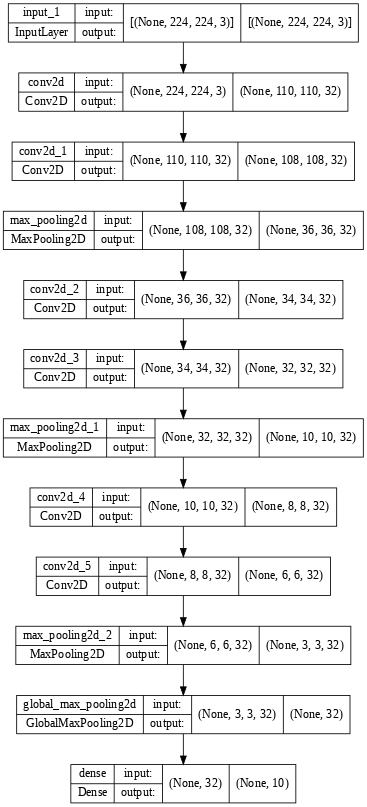

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi = 60)

#### Compile and Fit

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

x_train_aug = np.array(x_train_aug)
y_train_aug = np.array(y_train_aug)
x_validate_aug = np.array(x_validate_aug)
y_validate_aug = np.array(y_validate_aug)

history = model.fit(
    x=x_train_aug, 
    y=y_train_aug,
    epochs=30, 
    shuffle = True,
    validation_data=(x_validate_aug, y_validate_aug)
)

Epoch 1/30
40/40 [==============================] - 13s 40ms/step - loss: 1.8058 - accuracy: 0.2211 - val_loss: 1.6399 - val_accuracy: 0.2438
Epoch 2/30
40/40 [==============================] - 1s 29ms/step - loss: 1.6007 - accuracy: 0.2500 - val_loss: 1.5648 - val_accuracy: 0.2656
Epoch 3/30
40/40 [==============================] - 1s 29ms/step - loss: 1.5769 - accuracy: 0.2477 - val_loss: 1.5771 - val_accuracy: 0.2688
Epoch 4/30
40/40 [==============================] - 1s 29ms/step - loss: 1.5667 - accuracy: 0.2953 - val_loss: 1.5594 - val_accuracy: 0.2281
Epoch 5/30
40/40 [==============================] - 1s 29ms/step - loss: 1.5288 - accuracy: 0.3000 - val_loss: 1.4986 - val_accuracy: 0.2969
Epoch 6/30
40/40 [==============================] - 1s 30ms/step - loss: 1.4702 - accuracy: 0.3305 - val_loss: 1.4431 - val_accuracy: 0.4000
Epoch 7/30
40/40 [==============================] - 1s 30ms/step - loss: 1.4156 - accuracy: 0.3656 - val_loss: 1.3780 - val_accuracy: 0.3875
Epoch 8/30
4

#### Plot Results

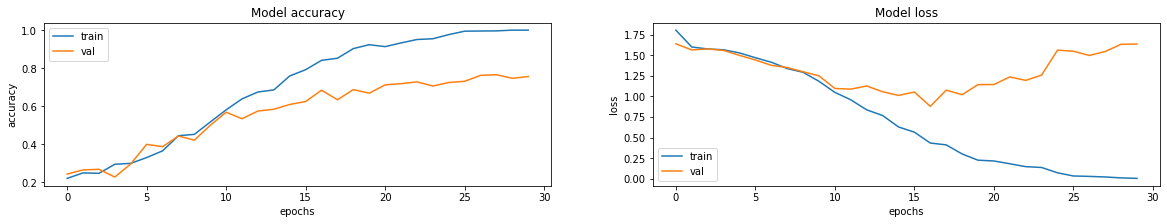

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])  

In [ ]:
val_loss, val_acc = model.evaluate(x_validate_aug,  y_validate_aug, verbose=2)
print("validation data accuracy : " , val_acc * 100 , "%") 

10/10 - 0s - loss: 1.6358 - accuracy: 0.7563 - 178ms/epoch - 18ms/step
validation data accuracy :  75.62500238418579 %


10/10 - 0s - loss: 1.6358 - accuracy: 0.7563 - 173ms/epoch - 17ms/step


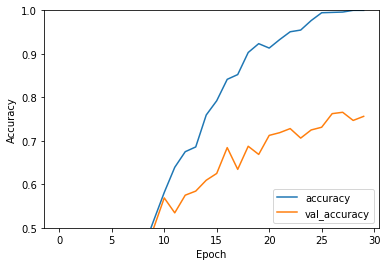

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_validate_aug, y_validate_aug , verbose=2)

In [ ]:
val_loss, val_acc = model.evaluate(x_test,  y_test, verbose=2)
print("test accuracy : " , val_acc * 100 , "%") 

4/4 - 0s - loss: 2.8981 - accuracy: 0.5300 - 316ms/epoch - 79ms/step
test accuracy :  52.99999713897705 %


#### Confusion Matrix

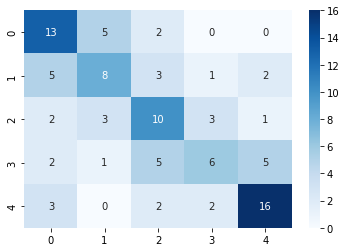

In [ ]:
y_test_pred = model.predict(x_test)

confusion_matrix_data = confusion_matrix(
    y_test, 
    np.argmax(y_test_pred, axis=1)
)
sns.heatmap(
    confusion_matrix_data, cmap = 'Blues', annot=True, vmin=0
)

## Another CNN model(main model)


```
As we saw in the previos section accuracy of model was not very good so I change my cnn model to a resnet 
model and we can see that our accuracy will increase very good.
```

#### Build resnet model

In [ ]:
in_sh = x_train_aug[0].shape
def build_resnet_model() :
  input = keras.Input(shape=(224, 224, 3))
  res_model =tf.keras.applications.ResNet50(
      input_shape= in_sh,
      include_top=False,
      weights="imagenet"
  )
  x = res_model(input)
  x= layers.GlobalAvgPool2D()(x)
  x= layers.Dense(units = 256 ,activation = 'relu')(x)
  x= layers.Dense(units = 128 ,activation = 'relu')(x)
  x= layers.Dropout(0.5)(x)
  x= layers.Dense(units = 5 ,activation = 'softmax')(x)

  res = tf.keras.Model(input, x)
  return res

res_model = build_resnet_model()

#### compile and fit

In [ ]:
res_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = res_model.fit(
    x=x_train_aug, 
    y=tf.keras.utils.to_categorical(
      y_train_aug
    ),
    epochs=50, 
    shuffle = True,
)

Epoch 1/50
40/40 [==============================] - 20s 320ms/step - loss: 0.2993 - accuracy: 0.9242
Epoch 2/50
40/40 [==============================] - 13s 325ms/step - loss: 0.1518 - accuracy: 0.9594
Epoch 3/50
40/40 [==============================] - 13s 325ms/step - loss: 0.2369 - accuracy: 0.9367
Epoch 4/50
40/40 [==============================] - 13s 321ms/step - loss: 0.1305 - accuracy: 0.9633
Epoch 5/50
40/40 [==============================] - 13s 318ms/step - loss: 0.1074 - accuracy: 0.9695
Epoch 6/50
40/40 [==============================] - 13s 317ms/step - loss: 0.1075 - accuracy: 0.9734
Epoch 7/50
40/40 [==============================] - 13s 318ms/step - loss: 0.0565 - accuracy: 0.9859
Epoch 8/50
40/40 [==============================] - 13s 319ms/step - loss: 0.1057 - accuracy: 0.9688
Epoch 9/50
40/40 [==============================] - 13s 321ms/step - loss: 0.0961 - accuracy: 0.9727
Epoch 10/50
40/40 [==============================] - 13s 322ms/step - loss: 0.0774 - accura

#### calculate accuracy of test:

In [ ]:
test_loss, test_acc = res_model.evaluate(
    x_test,
    tf.keras.utils.to_categorical(
      y_test
    ),
    verbose=2
)
print("test accuracy : " , test_acc * 100 , "%") 

4/4 - 1s - loss: 1.0873 - accuracy: 0.8000 - 1s/epoch - 343ms/step
test accuracy :  80.0000011920929 %


#### confusion matrix

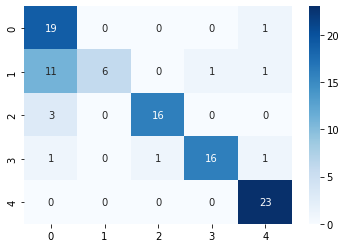

In [ ]:
y_test_pred = res_model.predict(x_test)

confusion_matrix_data = confusion_matrix(
    y_test, 
    np.argmax(y_test_pred, axis=1)
)
sns.heatmap(
    confusion_matrix_data, cmap = 'Blues', annot=True, vmin=0
)

## Bonus section

####  CNN And SVM


```
in this section by the use of mobilenet and CNN and SVM with each other we model the train set and th accuracy will increas.

```

#### Build  Mobile net Model

In [ ]:
def Build_Model(act_func = "sigmoid"): 
  mobile_model = MobileNetV2(include_top=True,weights='imagenet', input_shape=(224,224,3),classifier_activation=act_func)

  for layers in mobile_model.layers:
    layers.trainable = True
  return mobile_model
 
  
mobile_model = Build_Model(None)
mobile_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

#### make trainable data for SVM

In [ ]:
feature_extractor = mobile_model.predict(x_train_aug)
features = feature_extractor.reshape(feature_extractor.shape[0],-1)
SVM_X = features 
Feature_extractor = mobile_model.predict(x_validate_aug)
Features = Feature_extractor.reshape(Feature_extractor.shape[0],-1)
X_test_for_SVM = Features

#### SVM

In [ ]:
Classifier = SVC(kernel='rbf', random_state=2)
Classifier.fit(SVM_X,y_train_aug)
SVC(random_state=2)
prediction_SVM = Classifier.predict(X_test_for_SVM)
prediction_SVM = le.inverse_transform(prediction_SVM)

#### encode data and prediction

In [ ]:
le = LabelEncoder()
le.fit(prediction_SVM)
prediction_SVM_encoded = le.transform(prediction_SVM)

#### Evaluate Accuracy

In [ ]:
print ("Accuracy of test = ", (metrics.accuracy_score(y_validate_aug, prediction_SVM_encoded))*100,'%')

Accuracy of test =  83.75 %


#### Conclusion :


```
in this section by use of SVM and MobileNet Our Accuracy increased very well.
```

## Auto Encoder

#### add noise

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

#### show images with noise

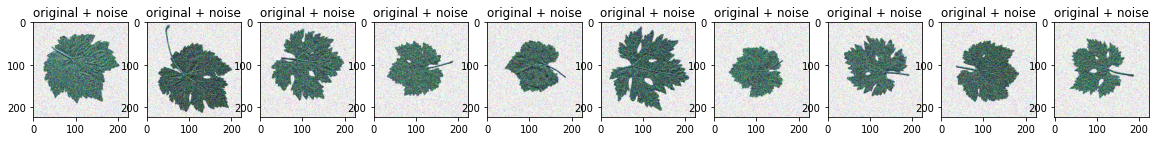

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(224, 224, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

#### compile and fit

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(np.array(x_train_noisy),
                np.array(x_train_aug[:400]),
                epochs=10,
                shuffle=True,
                validation_data=(np.array(x_test_noisy), np.array(x_test)))

Epoch 1/10
13/13 [==============================] - 2s 103ms/step - loss: 0.1630 - val_loss: 0.1667
Epoch 2/10
13/13 [==============================] - 1s 62ms/step - loss: 0.1410 - val_loss: 0.1140
Epoch 3/10
13/13 [==============================] - 1s 62ms/step - loss: 0.0858 - val_loss: 0.0589
Epoch 4/10
13/13 [==============================] - 1s 62ms/step - loss: 0.0766 - val_loss: 0.0580
Epoch 5/10
13/13 [==============================] - 1s 61ms/step - loss: 0.0717 - val_loss: 0.0521
Epoch 6/10
13/13 [==============================] - 1s 62ms/step - loss: 0.0692 - val_loss: 0.0489
Epoch 7/10
13/13 [==============================] - 1s 61ms/step - loss: 0.0664 - val_loss: 0.0430
Epoch 8/10
13/13 [==============================] - 1s 61ms/step - loss: 0.0632 - val_loss: 0.0356
Epoch 9/10
13/13 [==============================] - 1s 61ms/step - loss: 0.0601 - val_loss: 0.0265
Epoch 10/10
13/13 [==============================] - 1s 61ms/step - loss: 0.0588 - val_loss: 0.0225


In [ ]:
autoencoder.encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 112, 112, 16)      448       
                                                                 
 conv2d_16 (Conv2D)          (None, 56, 56, 8)         1160      
                                                                 
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 112, 112, 8)      584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 224, 224, 16)     1168      
 ranspose)                                                       
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 1)       145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

#### show result

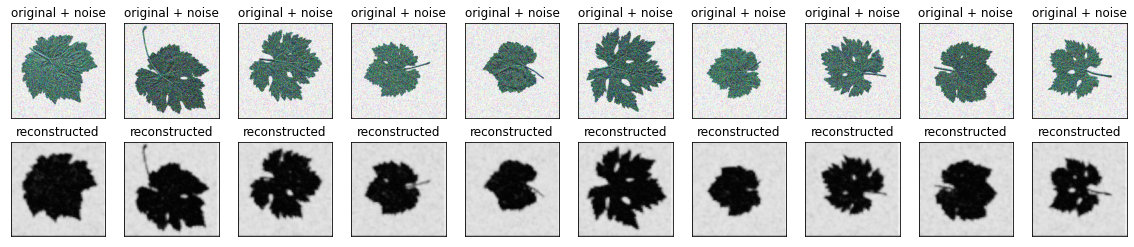

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Seed


```
in this section we change our random_atate number randomly and calculate accuracy
```

In [ ]:
# we define this function to run model with diffrent seeds:
def run_model_with_ran_seed(rand_s):
  x_train, x_test , y_train, y_test = train_test_split(images,labels_encoded, test_size = 0.2, random_state = random_s)
  x_train, x_test = x_train / 255.0, x_test / 255.0

  X_train = []
  Y_train = []
  for i,image in enumerate(x_train):
    X_train.append(image)
    X_train.append(FlipUp(image))
    X_train.append(FlipLR(image))
    X_train.append(Gauss(image))
    for _ in range(4): Y_train.append(y_train[i])


  x_train_aug, x_validate_aug , y_train_aug, y_validate_aug = train_test_split(X_train,Y_train, test_size = 0.2, random_state = random_s)
  x_train_aug = np.array(x_train_aug) 
  y_trian_aug = np.array(y_train_aug)

  x_validate_aug = np.array(x_validate_aug)
  y_validate_aug =  np.array(y_validate_aug)
  del X_train , Y_train

  model = build_resnet_model()  
  model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

  history = res_model.fit(
    x=x_train_aug, 
    y=tf.keras.utils.to_categorical(
      y_train_aug
    ),
    epochs=50, 
    shuffle = True,
  )

  test_loss, test_acc = res_model.evaluate(
    x_test,
    tf.keras.utils.to_categorical(
      y_test
    ),
    verbose=2
  )
  return test_acc * 100


```
now we create a list with length =10 and we push to it random number and get them to run_model_with_ran_seed() 
function and then we get all accuracies and we calculate the average.
```

In [ ]:
rand_states = []
for i in range(10):
  rand_states.append(np.random.randint(100))

sum_of_all_acc = 0
for r_s in rand_states: 
  sum_of_all_acc+= run_model_with_ran_seed(r_s)


print("average of accuracy with ten random state : " , sum_of_all_acc/10)

average of accuracy with ten random state :  82.11


## confusion matrix ...


```
As you can see after modeling and training i evaluate all results and plot results and I draw confusion matrix in that section

```

## Cros Fold

```
in this section we push our vaidation data to train set and then we divide it to ten fold and the we calculate the average of acc. 

```

In [ ]:
x_train_a = np.append(x_train_aug,x_validate_aug,axis = 0)
y_train_a = np.append(y_train_aug,y_validate_aug,axis = 0)

del x_train_aug,y_train_aug,x_validate_aug,y_validate_aug

kf = KFold(n_splits=10)
kf.get_n_splits(x_train_a)
acc_all = 0
res_model = build_resnet_model()

for train_index, test_index in kf.split(x_train_a):
  x_train, x_test = x_train_a[train_index,:], x_train_a[test_index,:]
  y_train, y_test = y_train_a[train_index], y_train_a[test_index]
  res_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

  history = res_model.fit(
    x=x_train, 
    y=tf.keras.utils.to_categorical(
      y_train
    ),
    epochs=40, 
    shuffle = True,
  ) 
  test_loss, test_acc = res_model.evaluate(
    x_test,
    tf.keras.utils.to_categorical(
      y_test
    ),
    verbose=2
  )
  acc_all+=(test_acc * 100)

  del x_train,x_test,y_train,y_test


print("result: " ,(acc_all /10)

```
as the google colab crashed and then don't let me to use GPU ram i cant run this section but it is actually true by i
don't have permioum account so it dont let me to use this so run time increased and it didn't run.
```

## report 

```
as you can see in every section of task i report and comment all things and result.
as final comment as you csn see at first we load data and then we build our model and then 
we train our model and finally calculate result and plot it by confusion matrix.

then i found another resnet model for cnn that was wery good and i use that and i made the model and calculate 
accuracy and finaly plot confusion matrx.

then in bonus section i actually use cnn and SVM to increase the accuracy.

then we use auto encoder to noise the iomages and denoise that and i show result.

then i generate random random_state and calculate accuracy.

in the last section i use 10 fold cross validation and calculate average of acc and report it.


```

```
Best Regard
Mohammad Zamani

```